#**Final Project - CSEC 520/620: Intrusion Detection using Machine Learning**
Team Name: Inferno  
Dataset: [2017-SUEE Dataset (SUEE1.pcap)](https://github.com/vs-uulm/2017-SUEE-data-set)  


## 📌 Project Overview

This project applies machine learning techniques to detect DoS-based intrusions in network traffic captured in the **SUEE1** PCAP file. The traffic includes anonymized web server connections (TCP ports 80 and 443) along with synthetic attacks such as **slowloris**, **slowhttptest**, and **slowloris-ng**.

### Pipeline Summary:
- Packet parsing and feature extraction using Scapy
- Data preprocessing, labeling, and cleaning
- Exploratory data analysis and visualization
- Feature importance analysis and clustering
- Model training and evaluation (baseline and ensemble methods)

> 🔧 **Note:**  
> - Mount **Google Drive** before running the notebook to access the PCAP file and store results.  
> - Install Scapy using `!pip install scapy` since it's not included in Colab by default.  
> - Run all cells **sequentially** to avoid runtime errors.  
> - The code cells for **loading and processing the PCAP file** and **data preprocessing** are **intentionally commented out**.  
>   - These steps are computationally expensive and only need to be run once.  
>   - After generating and saving the processed CSV file, you can skip these cells in future runs for faster execution.  
>   - Uncomment and run them only if you need to reprocess the raw PCAP data.


## 📁 Dataset Description

- **Source:** Ulm University – 2017 SUEE Dataset  
- **File Used:** `SUEE1.pcap`  
- **Traffic Type:** TCP (HTTP and HTTPS)  
- **Classes:** Benign vs. DoS Attack  
- **Packets:** ~2.09 million  

## ⚙️ Tools & Technologies

| Tool                | Purpose                                  |
|---------------------|------------------------------------------|
| **Google Colab**    | Development environment                  |
| **Scapy**           | PCAP parsing, feature extraction         |
| **Pandas, NumPy**   | Data manipulation                        |
| **Matplotlib, Seaborn** | Visualization                      |
| **Scikit-learn**    | ML models, evaluation, clustering        |


# **AI Statement for the Code**

## Tools Used:
- **GitHub Copilot with GPT-4o**: Primarily used for code generation, brainstorming, and structuring the notebook.
- **Claude.ai**: Assisted in refining and ensuring correctness of the implementation.

## Usage:
- **Code Execution & Results Validation**: The code was executed to verify correctness and ensure expected results.
- **Verification**: Results were cross-checked with real-world examples and development practices.


## Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Install required packages

In [ ]:
!pip install scapy


## Load and Process the PCAP File

The raw PCAP file is processed into a structured dataset using the `extract_features_from_pcap` function. Features such as `src_ip`, `dst_ip`, `protocol`, `length`, `interval`, etc., are extracted. The processed data is saved as a CSV file (`suee1_features.csv`) for further analysis.

In [ ]:
# from scapy.all import PcapReader, IP, TCP, UDP
# import pandas as pd

# def extract_features_from_pcap(pcap_file, chunk_size=50000):
#     """
#     Extract features from a PCAP file in chunks.
#     """
#     features = []
#     packet_count = 0
#     previous_timestamp = None  # To calculate intervals between packets

#     with PcapReader(pcap_file) as pcap:
#         for pkt in pcap:
#             try:
#                 if IP in pkt:
#                     # Extract IP-level features
#                     src_ip = pkt[IP].src
#                     dst_ip = pkt[IP].dst
#                     protocol = pkt[IP].proto

#                     # Extract transport-layer features
#                     if TCP in pkt:
#                         src_port = pkt[TCP].sport
#                         dst_port = pkt[TCP].dport
#                         transport_protocol = "TCP"
#                         flags = pkt[TCP].flags
#                         seq = pkt[TCP].seq
#                         ack = pkt[TCP].ack
#                         win = pkt[TCP].window
#                         options = pkt[TCP].options
#                     elif UDP in pkt:
#                         src_port = pkt[UDP].sport
#                         dst_port = pkt[UDP].dport
#                         transport_protocol = "UDP"
#                         flags = None
#                         seq = None
#                         ack = None
#                         win = None
#                         options = None
#                     else:
#                         src_port = None
#                         dst_port = None
#                         transport_protocol = "Other"
#                         flags = None
#                         seq = None
#                         ack = None
#                         win = None
#                         options = None

#                     # Extract packet length
#                     length = len(pkt)

#                     # Extract timestamp and calculate interval
#                     timestamp = pkt.time  # Packet timestamp
#                     if previous_timestamp is not None:
#                         interval = timestamp - previous_timestamp
#                     else:
#                         interval = None  # No interval for the first packet
#                     previous_timestamp = timestamp

#                     # Append extracted features to the list
#                     features.append({
#                         'src_ip': src_ip,
#                         'dst_ip': dst_ip,
#                         'protocol': protocol,
#                         'src_port': src_port,
#                         'dst_port': dst_port,
#                         'transport_protocol': transport_protocol,
#                         'length': length,
#                         'interval': interval,
#                         'flags': flags,
#                         'seq': seq,
#                         'ack': ack,
#                         'win': win,
#                         'options': options
#                     })

#                     packet_count += 1

#                     # Process in chunks
#                     if packet_count % chunk_size == 0:
#                         print(f"Processed {packet_count} packets...")
#                         # Save the current chunk to a DataFrame
#                         chunk_df = pd.DataFrame(features)
#                         yield chunk_df
#                         features = []  # Reset the features list for the next chunk
#             except Exception as e:
#                 print(f"Error processing packet: {e}")

#         # Yield any remaining packets after the loop
#         if features:
#             chunk_df = pd.DataFrame(features)
#             yield chunk_df

# # Path to your PCAP file
# pcap_path = "/content/drive/My Drive/CAML_Project/SUEE1.pcap"
# # Path to suee1_features.csv file
# output_path = "/content/drive/My Drive/CAML_Project/suee1_features.csv"

# # Process the PCAP file in chunks and save results
# print("Processing the PCAP file in chunks...")
# all_features = []  # To store all chunks
# for chunk in extract_features_from_pcap(pcap_path, chunk_size=50000):
#     all_features.append(chunk)

# # Combine all chunks into a single DataFrame
# suee1_df = pd.concat(all_features, ignore_index=True)

# # Save raw extracted features to a CSV file
# suee1_df.to_csv(output_path, index=False)
# print(f"All features saved to {output_path}")

## Data Preprocessing

The following preprocessing steps are applied to prepare the dataset for machine learning:
1. **Labeling**: Packets are labeled as `attack` or `benign` based on IP ranges.
2. **Removing Problematic IPs**: Certain IPs are excluded to avoid noise in the dataset.
3. **Encoding**: Categorical features like `src_ip`, `dst_ip`, and `transport_protocol` are encoded into numerical values using `LabelEncoder`.
4. **Handling Missing Values**: Missing values are handled using `SimpleImputer` with the mean strategy.
5. **Balancing the Dataset**: SMOTE is applied to oversample the minority class (`attack`).

These steps ensure the dataset is clean and ready for machine learning.

In [ ]:
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder

# # Load the dataset
# features_file = './drive/My Drive/CAML_Project/suee1_features.csv'  # Replace with your file path
# df = pd.read_csv(features_file)
# print(f"Loaded {len(df)} rows from {features_file}")

# # Label the data
# def label_data(df):
#     """
#     Label packets as 'attack' or 'benign' based on IP ranges.
#     """
#     def label_ip(src_ip, dst_ip):
#         if src_ip.startswith('10.128.0.') or dst_ip.startswith('10.128.0.'):
#             return 'attack'
#         return 'benign'

#     # Apply the labeling function to both src_ip and dst_ip
#     df['label'] = df.apply(lambda row: label_ip(row['src_ip'], row['dst_ip']), axis=1)
#     return df

# df = label_data(df)

# # Remove problematic IPs
# problematic_ips = ['10.128.0.50', '10.128.0.100']
# df = df[~df['src_ip'].isin(problematic_ips)]
# df = df[~df['dst_ip'].isin(problematic_ips)]

# # Encode categorical features
# def encode_features(df):
#     """
#     Encode source and destination IPs, transport protocol, and flags into numerical values.
#     """
#     le = LabelEncoder()
#     df['src_ip'] = le.fit_transform(df['src_ip'].astype(str))
#     df['dst_ip'] = le.fit_transform(df['dst_ip'].astype(str))
#     df['transport_protocol'] = le.fit_transform(df['transport_protocol'].astype(str))
#     df['flags'] = le.fit_transform(df['flags'].astype(str))
#     return df

# # Drop src_ip and dst_ip from the dataset
# df = df.drop(columns=['src_ip', 'dst_ip'])

# output_path = './drive/My Drive/CAML_Project/data_features.csv'

# # Save the processed dataset
# df.to_csv(output_path, index=False)
# print("Processed dataset saved to data_features.csv")

## Data Analysis

To better understand the dataset, the following analyses are performed:
1. **Label Distribution**: Visualize the distribution of `attack` and `benign` labels.
2. **Correlation Heatmap**: Analyze correlations between numerical features.
3. **Feature Distributions**: Plot histograms for numerical features like `length`, `interval`, etc.
4. **Clustering**: Use K-Means clustering to identify patterns in the dataset.

These analyses provide insights into the dataset and guide feature selection and model training.

### Load the preprocessed dataset

In [ ]:
import pandas as pd

features_file = './drive/My Drive/CAML_Project/data_features.csv'  # Replace with your file path
df = pd.read_csv(features_file)
print(f"Loaded {len(df)} rows from {features_file}")

# Split data into features and labels
X = df[['protocol', 'src_port', 'dst_port', 'transport_protocol', 'length', 'interval', 'flags', 'seq', 'ack', 'win', 'options']]
y = df['label']

# Encode labels (convert 'attack' and 'benign' to 1 and 0)
y = y.map({'benign': 0, 'attack': 1})

Loaded 2088765 rows from ./drive/My Drive/CAML_Project/data_features.csv


### Analyse the Dataset

Label distribution:
label
0    2061928
1      26837
Name: count, dtype: int64


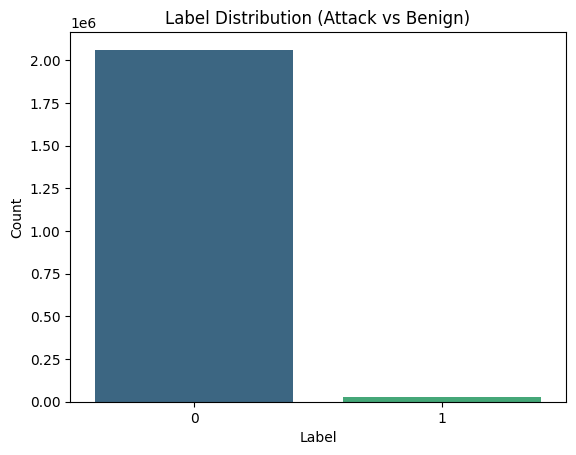

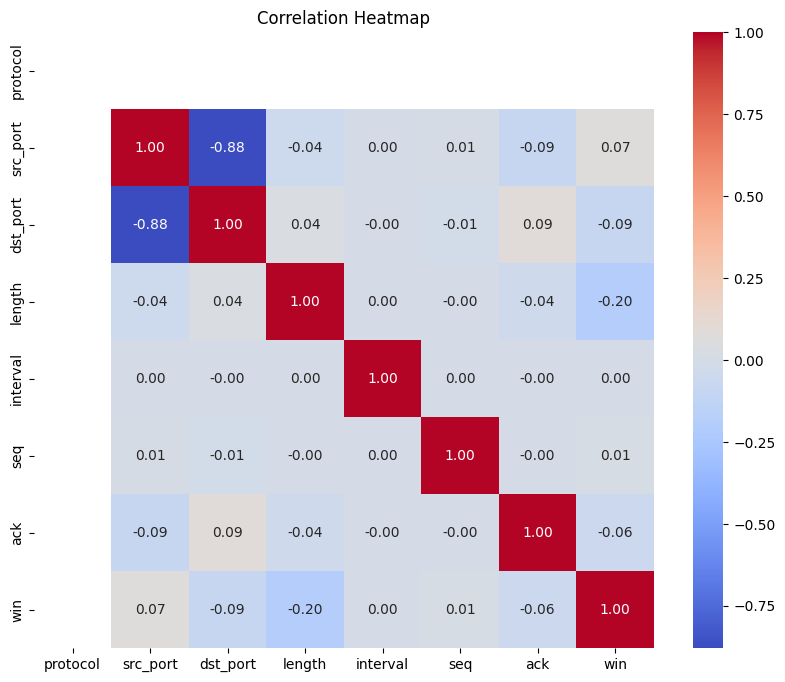

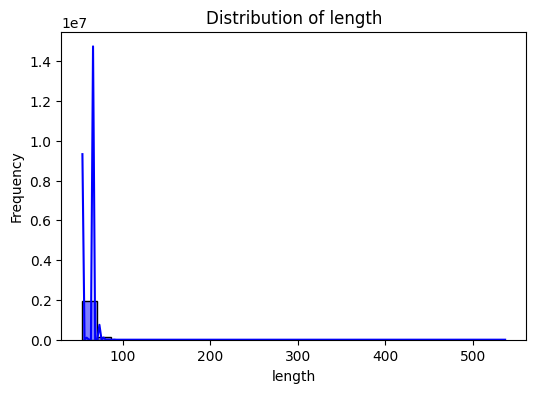

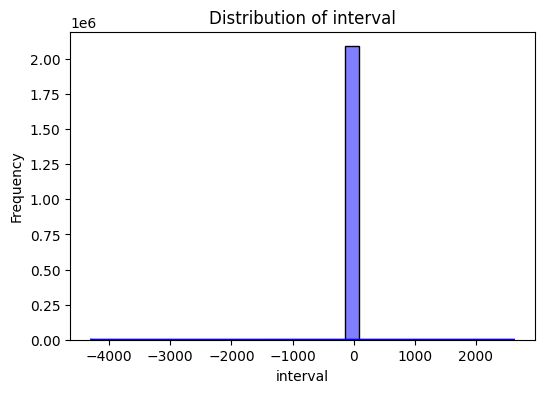

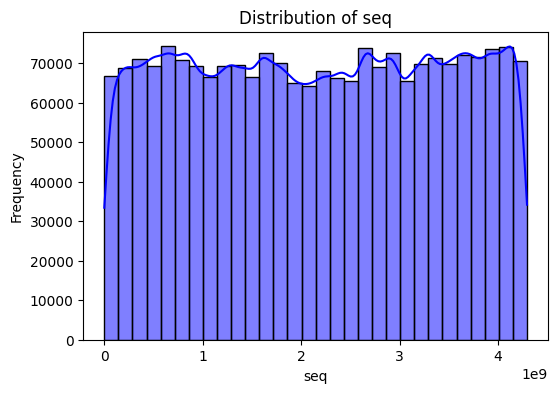

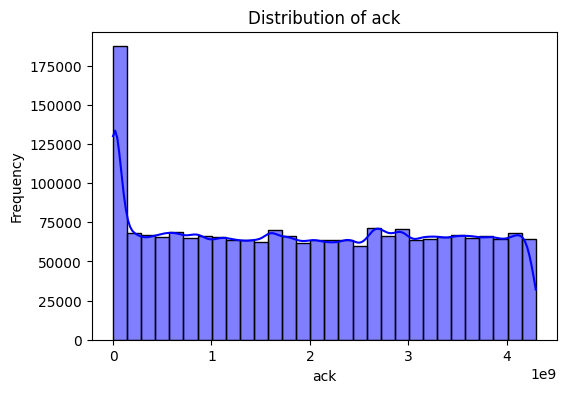

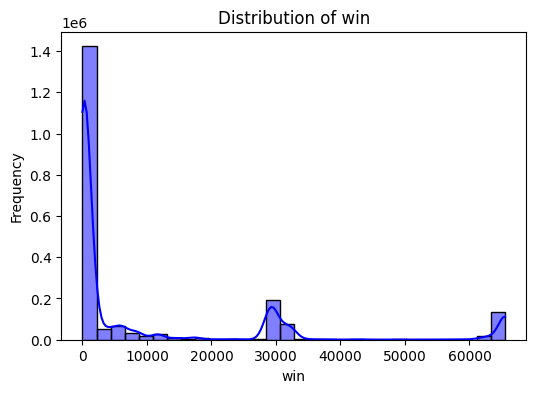

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze label distribution
print("Label distribution:")
print(y.value_counts())

# Visualize label distribution
sns.countplot(x=y, hue=y, palette='viridis', legend=False)
plt.title('Label Distribution (Attack vs Benign)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))

# Select only numeric columns for correlation
numeric_columns = df.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

# Distribution of numerical features
numerical_features = ['length', 'interval', 'seq', 'ack', 'win']
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


### Visualize Feature Importance
- Train a Random Forest model to compute feature importance.
- Visualize the importance of features like `win`, `length`, `options`, and `flags`.


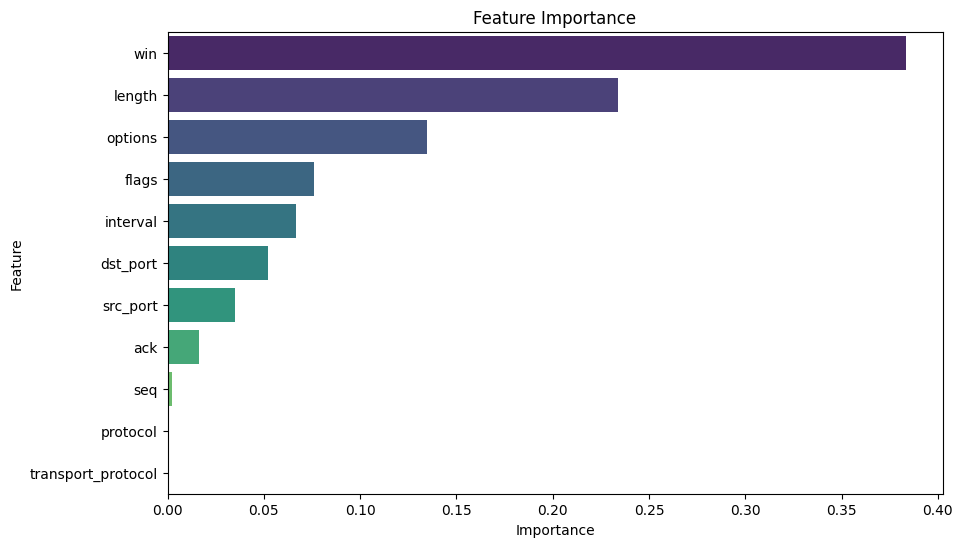

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Encode categorical features in X
X_encoded = X.copy()
X_encoded['transport_protocol'] = X_encoded['transport_protocol'].astype('category').cat.codes
X_encoded['flags'] = X_encoded['flags'].astype('category').cat.codes
X_encoded['options'] = X_encoded['options'].astype('category').cat.codes

# Train a Random Forest model to compute feature importance
rf_model = RandomForestClassifier(n_estimators=50, max_depth= 10, random_state=42)
rf_model.fit(X_encoded, y)

# Get feature importance
feature_importances = rf_model.feature_importances_
features = X_encoded.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', hue='Feature', palette='viridis', dodge=False, legend=False)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


### Clustering
- Perform K-Means clustering on numerical features (`length`, `interval`, `seq`, `ack`, `win`) after PCA dimensionality reduction.
- Visualize clusters and compare them with actual labels.

Silhouette Score (Sampled): 0.3516


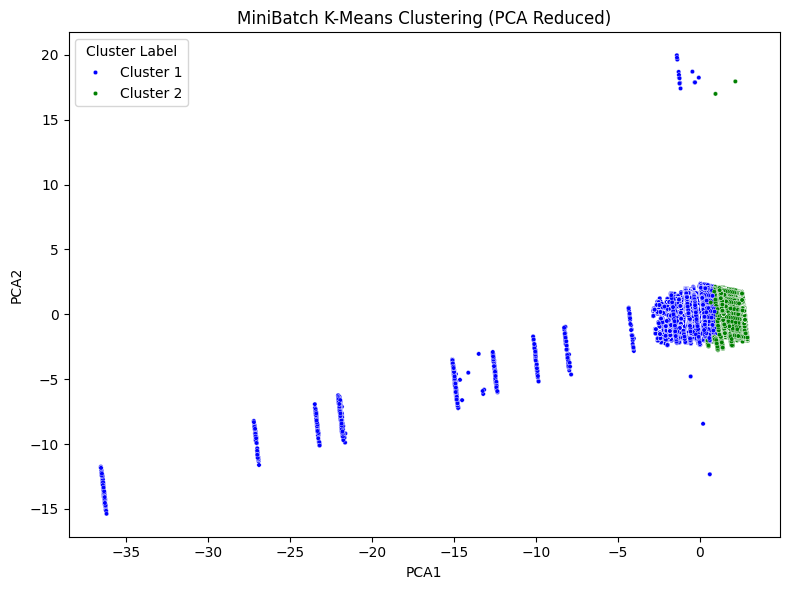

Cluster Distribution (Readable Labels):
Cluster_Label
Cluster 1    1764910
Cluster 2     323855
Name: count, dtype: int64

Mapped K-Means Clusters vs Actual Labels:
True Label        0      1
Cluster                   
Cluster 1   1738608  26302
Cluster 2    323320    535


In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Define X_clustering as a subset of X with numerical features
X_clustering = X[['length', 'interval', 'seq', 'ack', 'win']]

# Handle missing values in X_clustering by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X_clustering_imputed = imputer.fit_transform(X_clustering)

# Standardize the features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering_imputed)

# Reduce dimensions for visualization using PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Create a new DataFrame for clustering results
clustering_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

# -----------------------------
# MiniBatch K-Means Clustering
# -----------------------------
def perform_kmeans_clustering(X_scaled, clustering_df, y, sample_size=10000):
    # Use MiniBatchKMeans for large datasets
    kmeans = MiniBatchKMeans(n_clusters=2, random_state=42, batch_size=1000, max_iter=300)
    raw_clusters = kmeans.fit_predict(X_scaled)

    # Map raw clusters to readable labels ("Cluster 1" and "Cluster 2")
    cluster_names = {0: 'Cluster 1', 1: 'Cluster 2'}
    readable_clusters = np.vectorize(cluster_names.get)(raw_clusters)

    # Add readable cluster labels to the DataFrame
    clustering_df['Cluster_Label'] = readable_clusters
    clustering_df['KMeans_Cluster'] = raw_clusters  # Keep original cluster labels too

    # Calculate Silhouette Score on a smaller sample
    if len(X_scaled) > sample_size:
        indices = np.random.choice(len(X_scaled), sample_size, replace=False)
        X_sampled = X_scaled[indices]
        labels_sampled = raw_clusters[indices]  # Use raw labels for silhouette
    else:
        X_sampled = X_scaled
        labels_sampled = raw_clusters

    silhouette = silhouette_score(X_sampled, labels_sampled)
    print(f"Silhouette Score (Sampled): {silhouette:.4f}")

    # Visualize the K-means clusters with proper legend
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=clustering_df,
        x='PCA1',
        y='PCA2',
        hue='Cluster_Label',
        palette={'Cluster 1': 'blue', 'Cluster 2': 'green'},
        s=10
    )
    plt.title('MiniBatch K-Means Clustering (PCA Reduced)')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.legend(title='Cluster Label', loc='best')  # Auto-generated legend
    plt.tight_layout()
    plt.show()

    # Print the cluster distribution
    print("Cluster Distribution (Readable Labels):")
    print(clustering_df['Cluster_Label'].value_counts())

    # Analyze cluster alignment with true labels
    print("\nMapped K-Means Clusters vs Actual Labels:")
    print(pd.crosstab(clustering_df['Cluster_Label'], y, rownames=['Cluster'], colnames=['True Label']))

# Call the function with the true labels (y)
perform_kmeans_clustering(X_scaled, clustering_df, y)


### Data Splitting
- Split the dataset into training, validation, and test sets using `train_test_split` with stratification.


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")


Training set size: 1253259
Validation set size: 417753
Test set size: 417753


### Handle Class Imbalance with SMOTE
- Apply **SMOTE** to oversample the minority class (`attack`) in the training set.
- Visualize class distribution before and after SMOTE.



Class distribution before SMOTE:
Number of attack samples (1): 16103
Number of benign samples (0): 1237156

Class distribution after SMOTE:
Number of attack samples (1): 1237156
Number of benign samples (0): 1237156


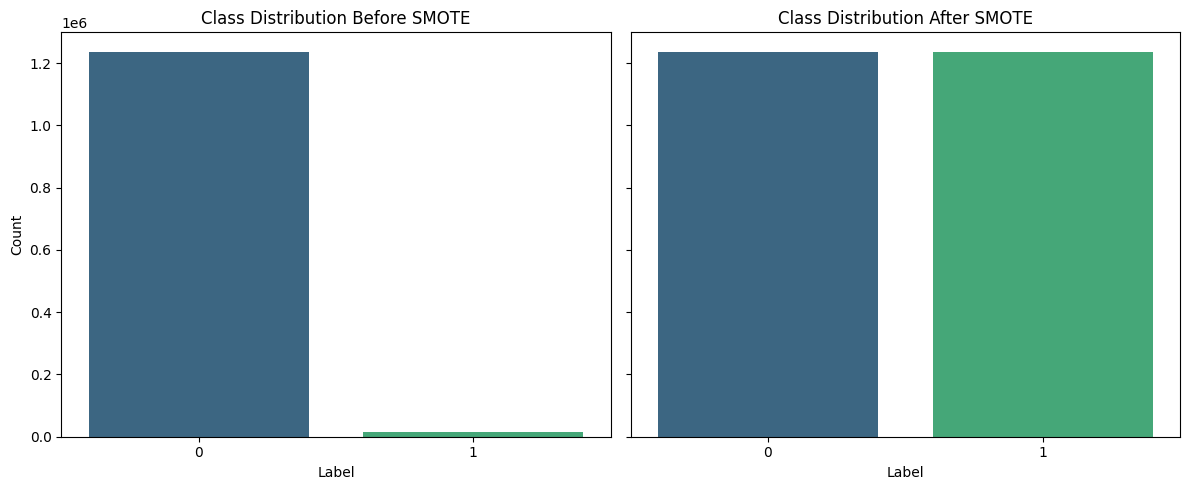

In [28]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

# Encode non-numeric columns in X_train
non_numeric_columns = ['transport_protocol', 'flags', 'options']
label_encoders = {col: LabelEncoder() for col in non_numeric_columns}

for col in non_numeric_columns:
    X_train[col] = label_encoders[col].fit_transform(X_train[col].astype(str))

# Handle missing values in X_train by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Apply SMOTE to oversample the minority class in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train)

# Display the class distribution before and after SMOTE
print("Class distribution before SMOTE:")
print(f"Number of attack samples (1): {sum(y_train == 1)}")
print(f"Number of benign samples (0): {sum(y_train == 0)}")

print("\nClass distribution after SMOTE:")
print(f"Number of attack samples (1): {sum(y_train_resampled == 1)}")
print(f"Number of benign samples (0): {sum(y_train_resampled == 0)}")

# Visualize class distribution before and after SMOTE
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Before SMOTE
sns.countplot(x=y_train, hue=y_train, palette='viridis', ax=axes[0], legend=False)
axes[0].set_title('Class Distribution Before SMOTE')
axes[0].set_xlabel('Label')
axes[0].set_ylabel('Count')

# After SMOTE
sns.countplot(x=y_train_resampled, hue=y_train_resampled, palette='viridis', ax=axes[1], legend=False)
axes[1].set_title('Class Distribution After SMOTE')
axes[1].set_xlabel('Label')

plt.tight_layout()
plt.show()


## Model Training and Evaluation
- Train models (`Logistic Regression`, `Decision Tree`, `Random Forest`, `Neural Network`) on the resampled training set.
- Evaluate models on the validation set using metrics like **classification report**, **confusion matrix**, and **ROC-AUC**.


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Define models for binary classification
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, class_weight='balanced'),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(50,), max_iter=300, random_state=42),
}

# Encode non-numeric columns in X_val
non_numeric_columns = ['transport_protocol', 'flags', 'options']
label_encoders_val = {col: LabelEncoder() for col in non_numeric_columns}

for col in non_numeric_columns:
    X_val[col] = label_encoders_val[col].fit_transform(X_val[col].astype(str))

# Handle missing values in X_val by imputing with the mean
imputer_val = SimpleImputer(strategy='mean')
X_val_imputed = imputer_val.fit_transform(X_val)

# Train and evaluate models
results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_resampled, y_train_resampled)
    y_val_pred = model.predict(X_val_imputed)

    # Calculate ROC-AUC if applicable
    roc_auc = roc_auc_score(y_val, model.predict_proba(X_val_imputed)[:, 1]) if hasattr(model, "predict_proba") else None

    # Store metrics in results dictionary
    results[model_name] = {
        "roc_auc": roc_auc,
    }

    # Print metrics
    print(f"{model_name} Metrics:")
    if roc_auc is not None:
        print(f"ROC-AUC: {roc_auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_val, y_val_pred, target_names=['benign', 'attack'], zero_division=0))
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_val_pred))

Training Logistic Regression...
Logistic Regression Metrics:
ROC-AUC: 0.6677
Classification Report:
              precision    recall  f1-score   support

      benign       0.99      0.94      0.97    412386
      attack       0.03      0.15      0.05      5367

    accuracy                           0.93    417753
   macro avg       0.51      0.54      0.51    417753
weighted avg       0.98      0.93      0.95    417753

Confusion Matrix:
[[389348  23038]
 [  4588    779]]
Training Decision Tree...
Decision Tree Metrics:
ROC-AUC: 0.8758
Classification Report:
              precision    recall  f1-score   support

      benign       1.00      0.95      0.98    412386
      attack       0.20      0.87      0.32      5367

    accuracy                           0.95    417753
   macro avg       0.60      0.91      0.65    417753
weighted avg       0.99      0.95      0.97    417753

Confusion Matrix:
[[393505  18881]
 [   720   4647]]
Training Random Forest...
Random Forest Metrics:
ROC

### Evaluate the Best Model on the Test Set

The best model is selected based on validation accuracy and evaluated on the test set. The following metrics are used:
1. **Test Accuracy**: Measures the overall performance of the model on unseen data.
2. **Classification Report**: Provides precision, recall, and F1-score for each class.
3. **Confusion Matrix**: Visualizes the true positives, true negatives, false positives, and false negatives.

Best Model: Random Forest
Test ROC-AUC: 0.9813
Test Classification Report:
              precision    recall  f1-score   support

      benign       1.00      0.90      0.95    412386
      attack       0.11      0.95      0.20      5367

    accuracy                           0.90    417753
   macro avg       0.55      0.92      0.57    417753
weighted avg       0.99      0.90      0.94    417753



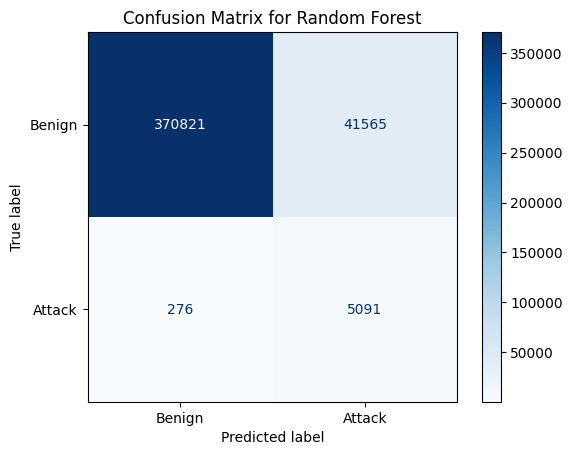

In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, roc_auc_score

# Encode non-numeric columns in X_test
non_numeric_columns = ['transport_protocol', 'flags', 'options']
label_encoders_test = {col: LabelEncoder() for col in non_numeric_columns}

for col in non_numeric_columns:
    X_test[col] = label_encoders_test[col].fit_transform(X_test[col].astype(str))

# Handle missing values in X_test by imputing with the mean
imputer_test = SimpleImputer(strategy='mean')
X_test_imputed = imputer_test.fit_transform(X_test)

# Select the best model based on ROC-AUC
best_model_name = max(results, key=lambda x: results[x]['roc_auc'])
best_model = models[best_model_name]

# Evaluate the best model on the test set
y_test_pred = best_model.predict(X_test_imputed)
roc_auc_test = roc_auc_score(y_test, best_model.predict_proba(X_test_imputed)[:, 1]) if hasattr(best_model, "predict_proba") else None

print(f"Best Model: {best_model_name}")
if roc_auc_test is not None:
    print(f"Test ROC-AUC: {roc_auc_test:.4f}")
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=['benign', 'attack']))

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, display_labels=['Benign', 'Attack'], cmap='Blues')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.show()

### Compare Models using Plots
- Compare the **ROC-AUC** of all trained models using a bar plot.
- Plot the **ROC-AUC curve** for all models to visualize their performance in distinguishing between `attack` and `benign` classes.

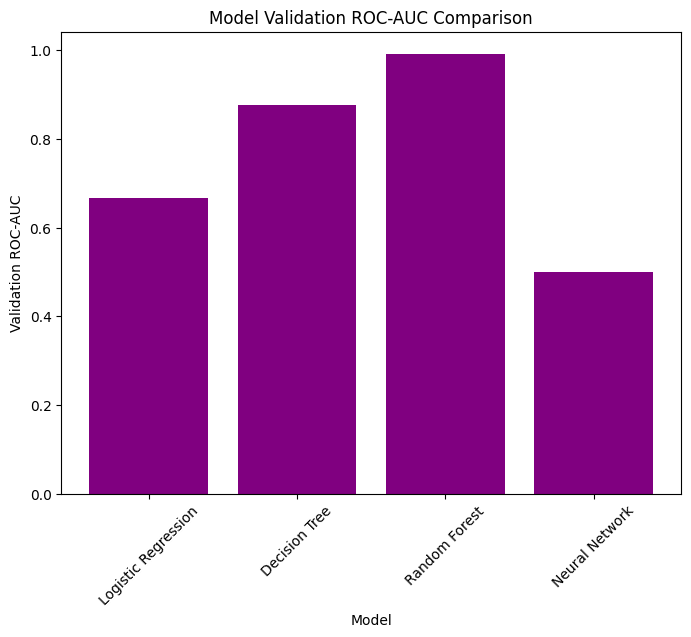

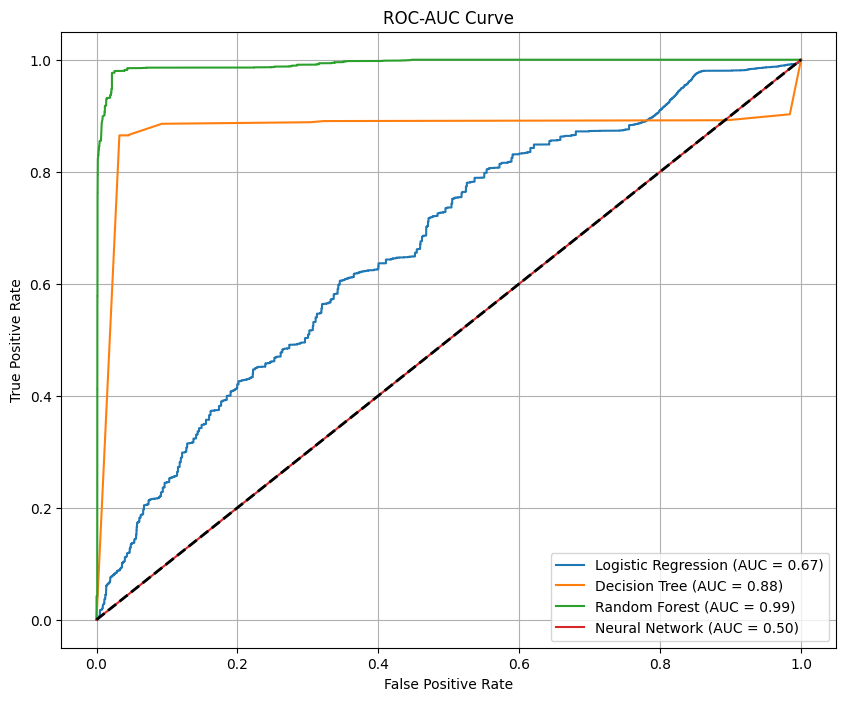

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Bar plot for model validation accuracy
plt.figure(figsize=(8, 6))

# Extract roc_auc values from the 'results' dictionary
roc_aucs = [result['roc_auc'] for result in results.values()]

# Use roc_aucs for the bar plot instead of accuracies
plt.bar(results.keys(), roc_aucs, color='purple')
plt.title('Model Validation ROC-AUC Comparison')  # Update title
plt.xlabel('Model')
plt.ylabel('Validation ROC-AUC')  # Update y-axis label
plt.xticks(rotation=45)
plt.show()

# Plot ROC-AUC curve for all models (this part remains the same)
plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    if hasattr(model, "predict_proba"):  # Check if the model supports predict_proba
        y_val_pred_proba = model.predict_proba(X_val_imputed)[:, 1]  # Get probabilities for the positive class
        fpr, tpr, _ = roc_curve(y_val, y_val_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.title('ROC-AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Extension Work

#### Ensemble Methods (VotingClassifier)

The **VotingClassifier** combines four base models — Logistic Regression, Decision Tree, Random Forest, and Neural Network — to make predictions based on majority voting or averaged probabilities, improving accuracy and reducing overfitting.


In [32]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Define base models for binary classification
models = [
    ("logistic_regression", LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')),
    ("decision_tree", DecisionTreeClassifier(max_depth=5, random_state=42, class_weight='balanced')),
    ("random_forest", RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, class_weight='balanced', n_jobs=-1)),
    ("neural_network", MLPClassifier(hidden_layer_sizes=(50,), max_iter=300, random_state=42)),
]

# Ensemble Voting Classifier (Hard Voting)
voting_clf = VotingClassifier(estimators=models, voting='soft')

# Encode non-numeric columns in X_val
non_numeric_columns = ['transport_protocol', 'flags', 'options']
label_encoders_val = {col: LabelEncoder() for col in non_numeric_columns}

for col in non_numeric_columns:
    X_val[col] = label_encoders_val[col].fit_transform(X_val[col].astype(str))

# Handle missing values in X_val by imputing with the mean
imputer_val = SimpleImputer(strategy='mean')
X_val_imputed = imputer_val.fit_transform(X_val)

# Reduce dimensionality with PCA (Set n_components <= min(number of features, samples))
pca = PCA(n_components=min(X_train_resampled.shape[1], X_train_resampled.shape[0]))  # Choose the lesser of features or samples
X_train_resampled_pca = pca.fit_transform(X_train_resampled)
X_val_imputed_pca = pca.transform(X_val_imputed)

# Train the ensemble model
print("Training Voting Classifier...")
voting_clf.fit(X_train_resampled_pca, y_train_resampled)
y_val_pred = voting_clf.predict(X_val_imputed_pca)

# Calculate ROC-AUC if applicable
roc_auc = roc_auc_score(y_val, voting_clf.predict_proba(X_val_imputed_pca)[:, 1])

# Print metrics
print("Voting Classifier Metrics:")
print(f"ROC-AUC: {roc_auc:.4f}")
print("Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=['benign', 'attack'], zero_division=0))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))


Training Voting Classifier...
Voting Classifier Metrics:
ROC-AUC: 0.8579
Classification Report:
              precision    recall  f1-score   support

      benign       0.99      0.99      0.99    412386
      attack       0.10      0.06      0.07      5367

    accuracy                           0.98    417753
   macro avg       0.55      0.52      0.53    417753
weighted avg       0.98      0.98      0.98    417753

Confusion Matrix:
[[409829   2557]
 [  5070    297]]
